In [16]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import re
import json

import sys
sys.path.insert(0, '../../')
import util.metrics as metrics
from util.metrics import StreamMetrics, StreamMetricsList
import util.misc as misc

ROOT_DIRECTORY = "../../"
BASE_DIRECTORY = f"{ROOT_DIRECTORY}/results/inter-zone-single-stream/packet-size/"
SECURE_DIRECTORY = f"{BASE_DIRECTORY}/secure/"
INSECURE_DIRECTORY = f"{BASE_DIRECTORY}/insecure/"


def get_packet_sizes():
    # Assumes the sizes are the same between secure, insecure 
    # directories!
    # Directory names are of the form 'size-128', and so on.
    directories = os.listdir(SECURE_DIRECTORY)
    return sorted(
        [int(re.search(r"size-([0-9]+)", directory)[1]) 
         for directory in directories]
    )


packet_sizes = get_packet_sizes()

secure_directories = [f"{SECURE_DIRECTORY}/size-{packet_size}/"
                      for packet_size in packet_sizes]

insecure_directories = [f"{INSECURE_DIRECTORY}/size-{packet_size}/"
                        for packet_size in packet_sizes]

secure_datas = StreamMetricsList([StreamMetrics(directory, skip=10)
                                  for directory in secure_directories])

insecure_datas = StreamMetricsList([StreamMetrics(directory, skip=10)
                                    for directory in insecure_directories])

print(f"PACKET SIZES:\t{packet_sizes}")

print(f"SECURE LATENCIES:\t{secure_datas.mean_latency()}")
print(f"INSECURE LATENCIES:\t{insecure_datas.mean_latency()}")

print(f"SECURE THROUGHPUTS:\t{secure_datas.mean_throughput()}")
print(f"INSECURE THROUGHPUTS:\t{insecure_datas.mean_throughput()}")

print(f"SECURE JITTERS:\t{secure_datas.mean_jitter()}")
print(f"INSECURE JITTERS:\t{insecure_datas.mean_jitter()}")

print(f"SECURE DROP RATE:\t{secure_datas.drop_rate()}")
print(f"INSECURE DROP RATE:\t{insecure_datas.drop_rate()}")




PACKET SIZES:	[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450]
SECURE LATENCIES:	[3.81920e-05 5.17920e-05 6.53920e-05 7.89920e-05 9.25920e-05 1.06192e-04
 1.19792e-04 1.33392e-04 1.46992e-04 1.60592e-04 1.74192e-04 1.87792e-04
 2.01392e-04 2.14992e-04 2.28592e-04 2.42192e-04 2.55792e-04 2.69392e-04
 2.82992e-04 2.96592e-04 3.10192e-04 3.23792e-04 3.37392e-04 3.50992e-04
 3.64592e-04 3.78192e-04 3.91792e-04 4.05392e-04 4.18992e-04]
INSECURE LATENCIES:	[1.69040e-05 2.57040e-05 3.45040e-05 4.33040e-05 5.21040e-05 6.09040e-05
 6.97040e-05 7.85040e-05 8.73040e-05 9.61040e-05 1.04904e-04 1.13704e-04
 1.22504e-04 1.31304e-04 1.40104e-04 1.48904e-04 1.57704e-04 1.66504e-04
 1.75304e-04 1.84104e-04 1.92904e-04 2.01704e-04 2.10504e-04 2.19304e-04
 2.28104e-04 2.36904e-04 2.45704e-04 2.54504e-04 2.63304e-04]
SECURE THROUGHPUTS:	[62500. 62500. 62500. 62500. 62500. 62500. 62500. 62500. 62500. 6

<Figure size 2560x1920 with 0 Axes>

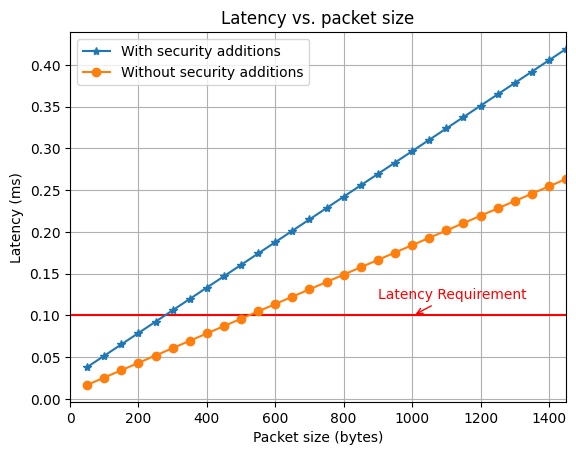

In [17]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.axhline(0.1, color='red')
ax.plot(packet_sizes, secure_datas.mean_latency() * 1000, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.mean_latency() * 1000, 'o-', label="Without security additions")
ax.annotate("Latency Requirement", xy=(1003, 0.10), xytext=(900, 0.12),
             color='red',
             arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Latency (ms)")
ax.set_title("Latency vs. packet size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/latency.png")

<Figure size 2560x1920 with 0 Axes>

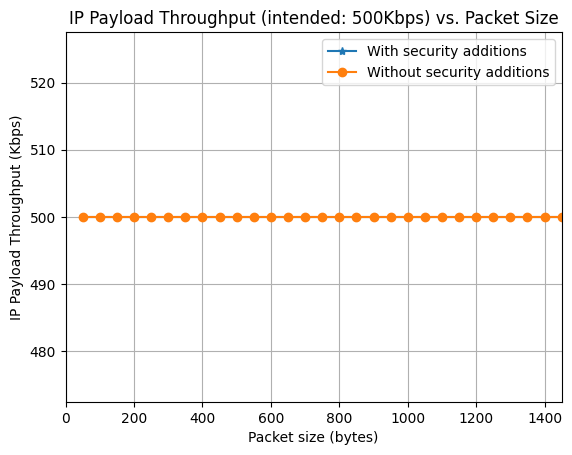

In [18]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_datas.mean_throughput() / 1000 * 8, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.mean_throughput() / 1000 * 8, 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("IP Payload Throughput (Kbps)")
ax.set_title("IP Payload Throughput (intended: 500Kbps) vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/throughput.png")

<Figure size 2560x1920 with 0 Axes>

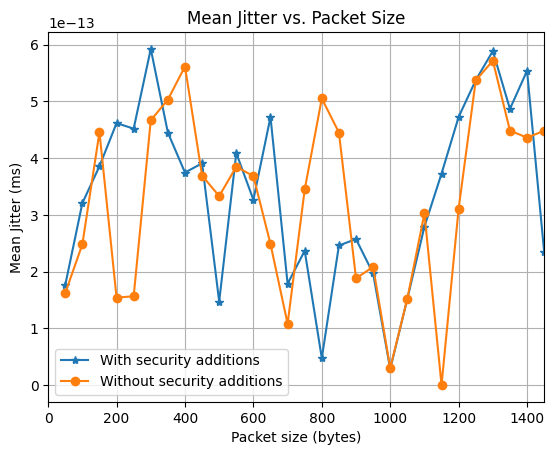

In [19]:
plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_datas.mean_jitter() * 1000, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.mean_jitter() * 1000, 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Mean Jitter (ms)")
ax.set_title("Mean Jitter vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/jitter.png")

<Figure size 2560x1920 with 0 Axes>

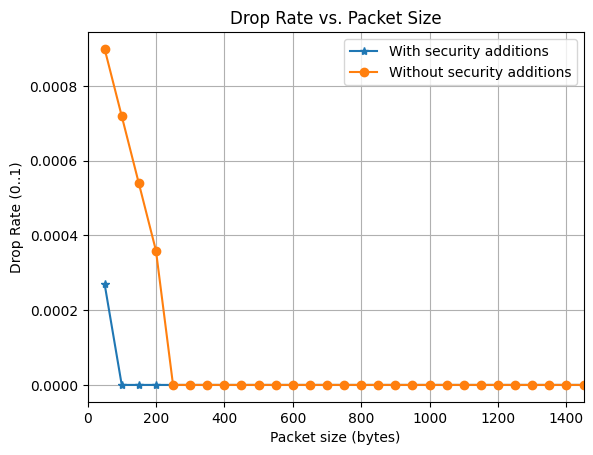

In [20]:

plt.figure(dpi=400)
fig, ax = plt.subplots()

ax.plot(packet_sizes, secure_datas.drop_rate(), '*-', label="With security additions")
ax.plot(packet_sizes, insecure_datas.drop_rate(), 'o-', label="Without security additions")
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Drop Rate (0..1)")
ax.set_title("Drop Rate vs. Packet Size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/drop_rate.png")